<a href="https://colab.research.google.com/github/evanzs/curso_ml_minsait/blob/main/Notebooks/Aula02/exercicios_redes_neurais_iamgem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report


tf.get_logger().setLevel('WARNING')

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


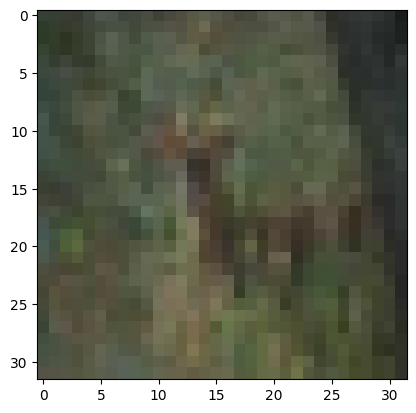

In [25]:
# Escolhendo uma imagem para plotar
sample = 10
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [26]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

In [27]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape,

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [29]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [30]:
x_treino.shape

(40000, 32, 32, 3)

In [10]:
32*32

1024

In [31]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 1024))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

In [32]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])
#### 6. Treinamento

historico = rede_simples.fit(x_treino,
                             y_treino,
                             epochs = 100,
                             verbose = 0,
                             validation_data = (x_val, y_val))

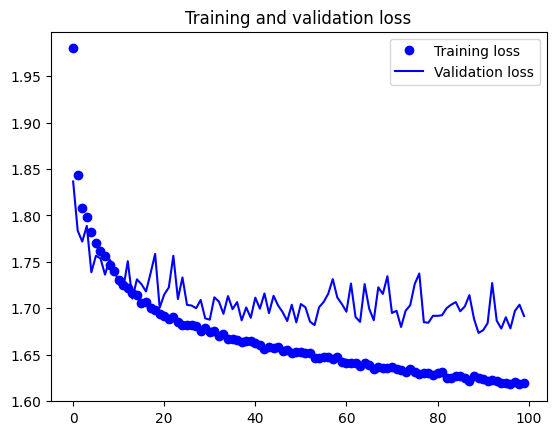

In [33]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 14: early stopping


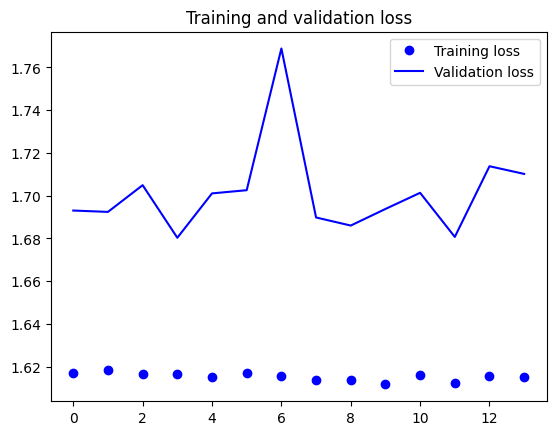

In [35]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.377

In [38]:
#analisando a matriz de confusão

confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[443,  87, 113,  27,   2,  33,  32,  39, 170,  54],
       [ 35, 620,  42,  32,  10,  24,  51,  37,  41, 108],
       [104,  62, 393,  49,  19, 116, 152,  58,  37,  10],
       [ 26,  75, 165, 114,  25, 244, 238,  56,  30,  27],
       [ 49,  33, 326,  54,  81,  88, 217, 120,  17,  15],
       [ 27,  59, 199,  87,  33, 329, 164,  54,  32,  16],
       [  7,  42, 172,  55,  34, 102, 542,  23,  11,  12],
       [ 55,  40, 147,  47,  54,  97,  68, 416,  22,  54],
       [162, 133,  35,  41,   2,  55,  14,  11, 466,  81],
       [ 51, 318,  29,  28,   8,  23,  46,  54,  77, 366]])

In [39]:
#Regulariznado dropout

rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 1024))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [40]:
historico = rede_dropout.fit(x_treino,
                             y_treino,
                             epochs = 150,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 7s 5ms/step - loss: 2.2202 - accuracy: 0.1433 - val_loss: 2.1469 - val_accuracy: 0.1843
Epoch 2/150
1250/1250 [==============================] - 7s 5ms/step - loss: 2.1898 - accuracy: 0.1515 - val_loss: 2.1069 - val_accuracy: 0.1915
Epoch 3/150
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1819 - accuracy: 0.1555 - val_loss: 2.0905 - val_accuracy: 0.1908
Epoch 4/150
1250/1250 [==============================] - 6s 5ms/step - loss: 2.1776 - accuracy: 0.1575 - val_loss: 2.1217 - val_accuracy: 0.1656
Epoch 5/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1737 - accuracy: 0.1583 - val_loss: 2.1271 - val_accuracy: 0.1746
Epoch 6/150
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1736 - accuracy: 0.1601 - val_loss: 2.1319 - val_accuracy: 0.1801
Epoch 7/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1723 - accuracy: 0.1599 - val_loss: 2.0813 - val_ac

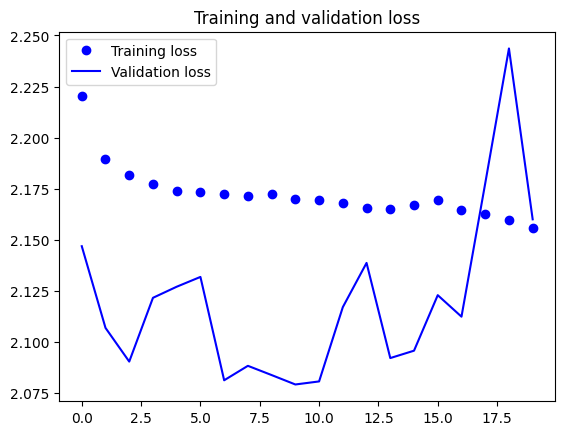

In [41]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 1s 3ms/step


0.168